<a href="https://colab.research.google.com/github/chethanataltaje/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

Loading and exploring the dataset

In [2]:
df=pd.read_csv("/content/TelcoCustomerChurn.csv")
print(df.head())
print(df.tail())
print("\nShape:",df.shape)
print(df.describe())
print("\nColumns:", df.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
print(df.isnull().sum()) #checking for null/missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
print(df.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


Data Preprocessing

In [5]:
df['TotalCharges'].dtype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')#Total charges should be made to float datatype
df['TotalCharges'].dtype
df.drop('customerID', axis=1, inplace=True) #customerID is dropped as  it contributes no predictive value

In [6]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median()) #fills the missing values in the column TotalCharges with the median value of that column

print(df.select_dtypes(include=['object']).columns)

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] #Encode Binary Categorical Columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod','MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                          'DeviceProtection', 'TechSupport', 'StreamingTV',
                                          'StreamingMovies'], drop_first=True) #Performing one-hot encoding for multi-class categorical columns



Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


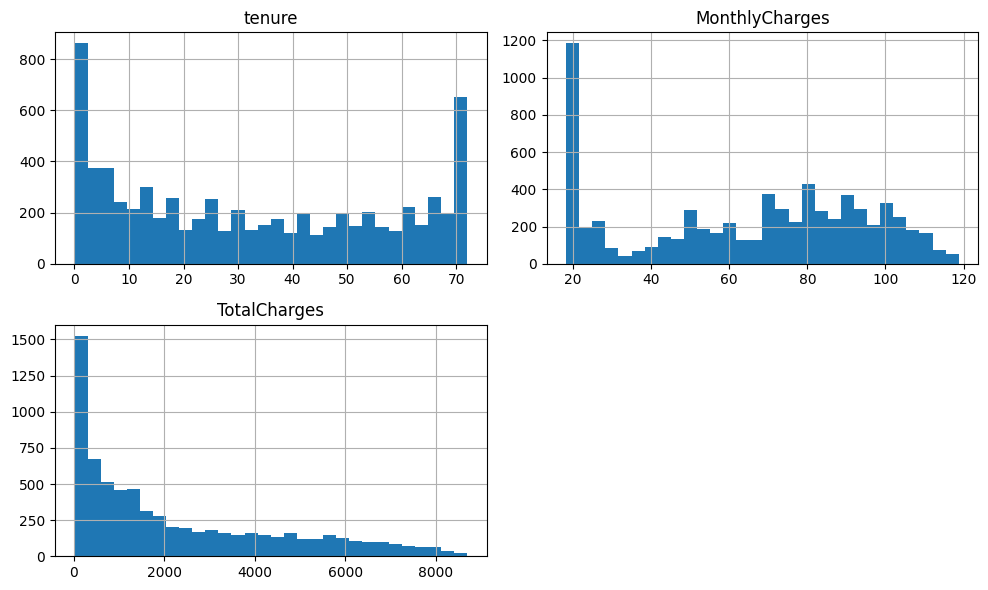

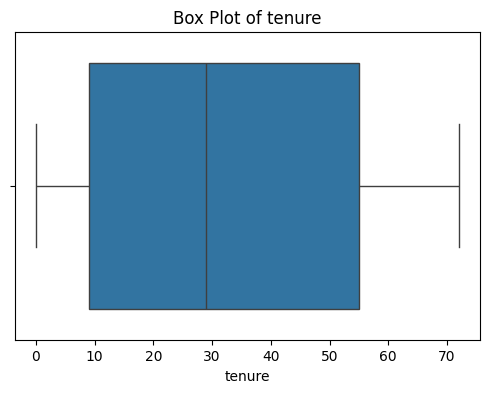

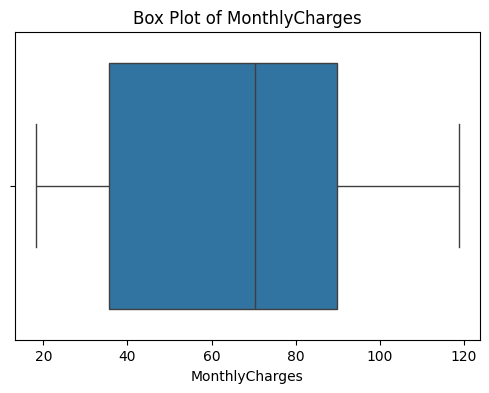

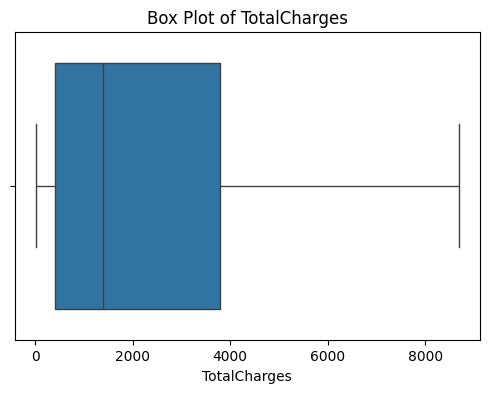

In [8]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=30, figsize=(10, 6), layout=(2, 2))
plt.tight_layout()
plt.show()

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Box Plot of {col}")
    plt.show()

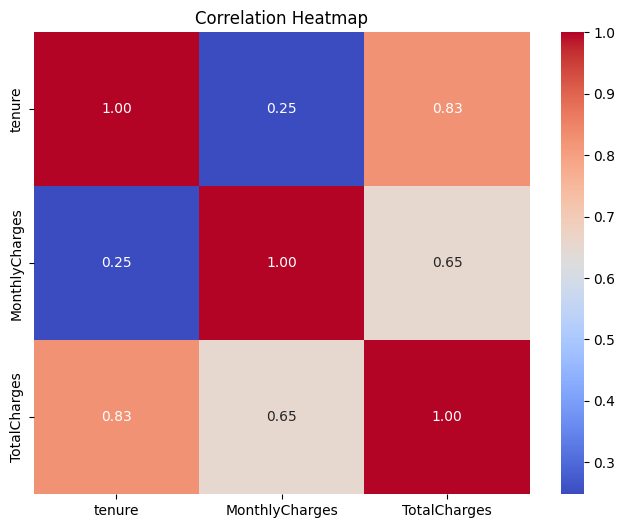

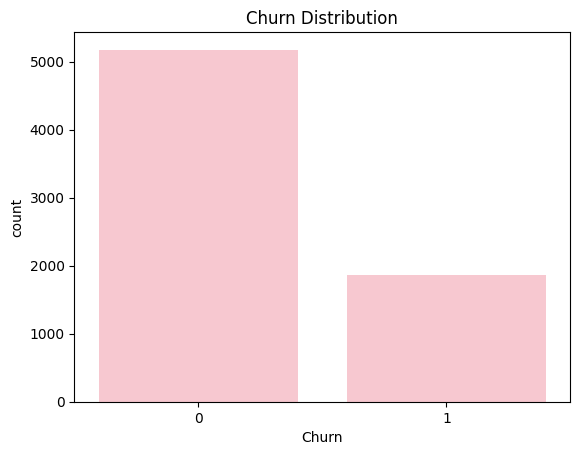

In [9]:
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(8, 6))# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Bar plot for Churn distribution
sns.countplot(data=df, x='Churn', color='pink')
plt.title("Churn Distribution")
plt.show()




Scale numerical features

In [10]:
print(df.select_dtypes(include=['float64', 'int64']).columns) #Identify numerical columm
print( )
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges'] #Binary-encoded columns and one-hot-encoded columns don't need scaling
print(df[num_cols].describe())
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols]) #apply scaling to numerical columns
print("\n",df[num_cols].describe())

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

              tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01  

Splitting Data into Training and Testing Set

In [11]:

X = df.drop(columns='Churn') #Features
y = df['Churn']         #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5634, 30)
X_test shape: (1409, 30)
y_train shape: (5634,)
y_test shape: (1409,)


Training a Logistic Regression Model


Accuracy: 0.8048261178140526

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



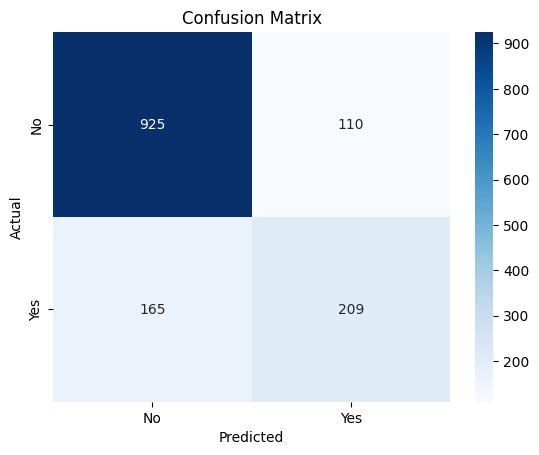

In [12]:


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

using SMOTE

Before SMOTE: Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4139
1    4139
Name: count, dtype: int64

Accuracy: 0.7317246273953159

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1035
           1       0.50      0.70      0.58       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



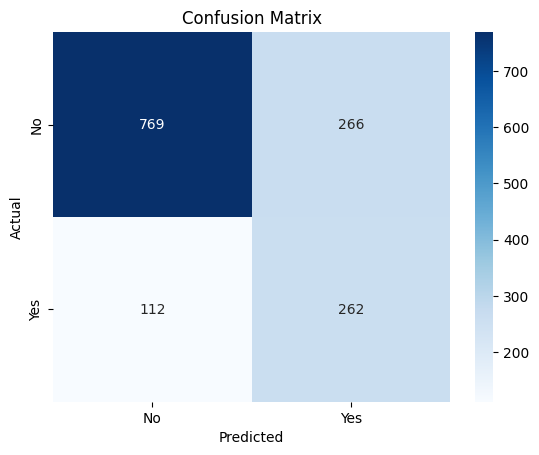

In [15]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

after SMOTE - accuracy is lesser but recall is better